In [1]:
!pip install pandas matplotlib scikit-learn



In [2]:
import pandas as pd

file_path = r'C:\Users\u\OneDrive - Swinburne University\Policy Documents\Investment Amounts by country.xlsx'
data = pd.read_excel(file_path)

print(data.head())


  Country  Year  Expenditure on Renewable Energy (billion USD)
0  China   2020                                          213.0
1  China   2021                                          216.0
2  China   2022                                          302.0
3  China   2023                                          388.0
4  China   2024                                          409.0


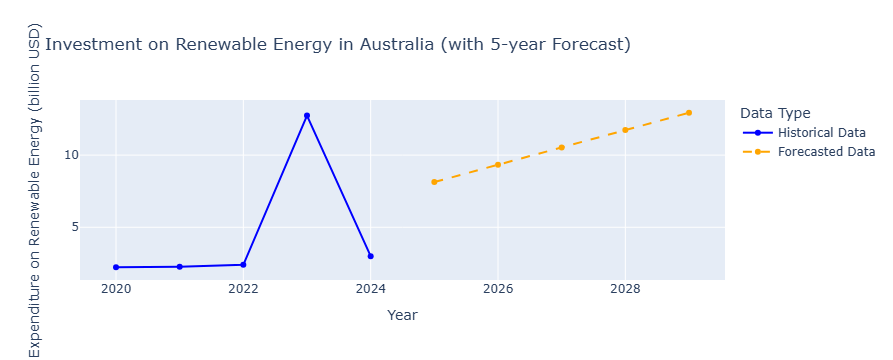

In [24]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
import plotly.io as pio

australia_data = data[data['Country'] == 'Australia']

X = np.array(australia_data['Year']).reshape(-1, 1)
y = np.array(australia_data['Expenditure on Renewable Energy (billion USD)'])

model = LinearRegression().fit(X, y)

future_years = np.array([2025, 2026, 2027, 2028, 2029]).reshape(-1, 1)
future_expenditure = model.predict(future_years)

fig = go.Figure()

fig.add_trace(go.Scatter(x=australia_data['Year'], 
                         y=australia_data['Expenditure on Renewable Energy (billion USD)'], 
                         mode='lines+markers', name='Historical Data', marker=dict(color='blue')))

fig.add_trace(go.Scatter(x=future_years.flatten(), 
                         y=future_expenditure, 
                         mode='lines+markers', name='Forecasted Data', 
                         line=dict(dash='dash', color='orange')))

fig.update_layout(title='Investment on Renewable Energy in Australia (with 5-year Forecast)',
                  xaxis_title='Year',
                  yaxis_title='Expenditure on Renewable Energy (billion USD)',
                  legend_title='Data Type')

fig.show()

pio.write_html(fig, file='australia_investment_forecast.html', auto_open=False)
